# Análise Socioeconômica Regional do Brasil (PIB, População e IDH)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import re # Regex para limpeza do dinheiro

print("Bibliotecas importadas!")

Bibliotecas importadas!


In [8]:
print("Faça o upload dos 2 arquivos: 'ibge_estados_2024.csv' e 'mapa_regioes_brasil.csv'")
uploaded = files.upload()

# Carregando os dados
df_estados = pd.read_csv(io.BytesIO(uploaded['ibge_estados_2024.csv']))
df_regioes = pd.read_csv(io.BytesIO(uploaded['mapa_regioes_brasil.csv']))

print("\nArquivos carregados com sucesso!")
display(df_estados.head())
display(df_regioes.head())

Faça o upload dos 2 arquivos: 'ibge_estados_2024.csv' e 'mapa_regioes_brasil.csv'


Saving ibge_estados_2024.csv to ibge_estados_2024.csv
Saving mapa_regioes_brasil.csv to mapa_regioes_brasil.csv

Arquivos carregados com sucesso!


,Sigla,Nome_Estado,Capital,Populacao_Total,IDH,PIB_BRL
0,SP,São Paulo,São Paulo,44411238,0.826,"R$ 2.756.980.000.000,00"
1,RJ,Rio de Janeiro,Rio de Janeiro,17264943,0.761,"R$ 949.344.000.000,00"
2,MG,Minas Gerais,Belo Horizonte,21168791,0.731,"R$ 806.745.000.000,00"
3,ES,Espírito Santo,Vitória,4018650,0.740,"R$ 185.341.000.000,00"
4,PR,Paraná,Curitiba,11444380,0.749,"R$ 549.973.000.000,00"


,Sigla,Regiao
0,SP,Sudeste
1,RJ,Sudeste
2,MG,Sudeste
3,ES,Sudeste
4,PR,Sul


# 2. Limpeza de Dados (Data Cleaning) - O Desafio (PIB)

In [9]:
# Vamos inspecionar os tipos de dados
print("--- Tipos de Dados Originais ---")
df_estados.info()
# Note que 'PIB_BRL' é um 'object' (texto)

# Função para limpar a coluna 'PIB_BRL'
def limpar_pib(valor):
    # 1. Remove "R$ "
    valor_limpo = str(valor).replace('R$', '').strip()
    # 2. Remove o separador de milhar "."
    valor_limpo = valor_limpo.replace('.', '')
    # 3. Substitui o separador decimal "," por "."
    valor_limpo = valor_limpo.replace(',', '.')
    # 4. Converte para número (float)
    return float(valor_limpo)

# Aplicando a função
df_estados['PIB_Numerico'] = df_estados['PIB_BRL'].apply(limpar_pib)

print("\n--- Coluna 'PIB_Numerico' limpa e criada ---")
display(df_estados[['Nome_Estado', 'PIB_BRL', 'PIB_Numerico']].head())

--- Tipos de Dados Originais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sigla            27 non-null     object 
 1   Nome_Estado      27 non-null     object 
 2   Capital          27 non-null     object 
 3   Populacao_Total  27 non-null     int64  
 4   IDH              27 non-null     float64
 5   PIB_BRL          27 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ KB

--- Coluna 'PIB_Numerico' limpa e criada ---


,Nome_Estado,PIB_BRL,PIB_Numerico
0,São Paulo,"R$ 2.756.980.000.000,00",2.756980e+12
1,Rio de Janeiro,"R$ 949.344.000.000,00",9.493440e+11
2,Minas Gerais,"R$ 806.745.000.000,00",8.067450e+11
3,Espírito Santo,"R$ 185.341.000.000,00",1.853410e+11
4,Paraná,"R$ 549.973.000.000,00",5.499730e+11


# 3. Unindo (Merge) as Tabelas e Engenharia de Features

In [10]:
# 1. Unir (merge) os estados com suas regiões
# A chave ("on") é a coluna 'Sigla'
df_completo = pd.merge(
    df_estados,
    df_regioes,
    on='Sigla',
    how='left' # 'left' para manter todos os estados e adicionar a região
)

# 2. Engenharia de Features: Criar 'PIB_Per_Capita'
df_completo['PIB_Per_Capita'] = df_completo['PIB_Numerico'] / df_completo['Populacao_Total']

print("Tabela final unida e com 'PIB_Per_Capita':")
display(df_completo.sort_values(by='PIB_Per_Capita', ascending=False).head())

Tabela final unida e com 'PIB_Per_Capita':


,Sigla,Nome_Estado,Capital,Populacao_Total,IDH,PIB_BRL,PIB_Numerico,Regiao,PIB_Per_Capita
10,DF,Distrito Federal,Brasília,3015268,0.824,"R$ 286.944.000.000,00",2.869440e+11,Centro-Oeste,95163.680310
0,SP,São Paulo,São Paulo,44411238,0.826,"R$ 2.756.980.000.000,00",2.756980e+12,Sudeste,62078.431590
8,MT,Mato Grosso,Cuiabá,3484466,0.725,"R$ 203.627.000.000,00",2.036270e+11,Centro-Oeste,58438.509660
1,RJ,Rio de Janeiro,Rio de Janeiro,17264943,0.761,"R$ 949.344.000.000,00",9.493440e+11,Sudeste,54986.801868
5,SC,Santa Catarina,Florianópolis,7164788,0.774,"R$ 386.313.000.000,00",3.863130e+11,Sul,53918.273646


# 4. Análise e Visualização (Respondendo as Perguntas)

/tmp/ipython-input-3407153509.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


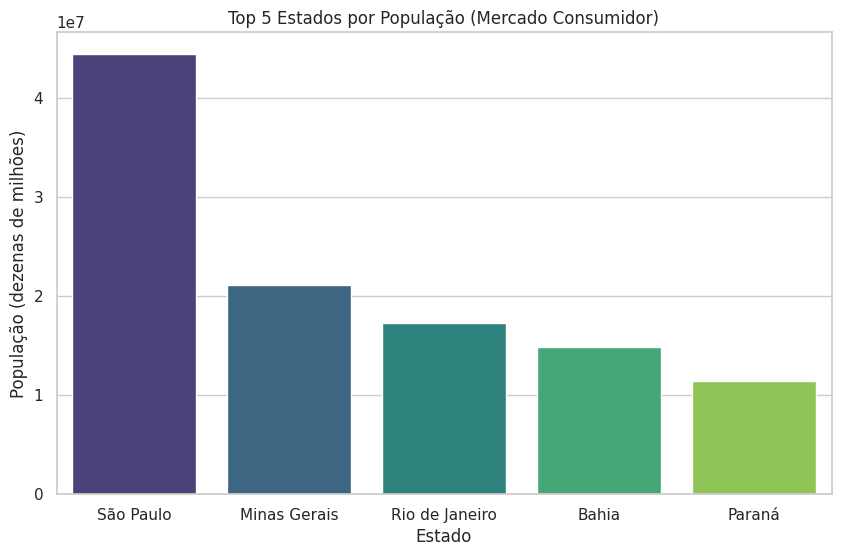

/tmp/ipython-input-3407153509.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


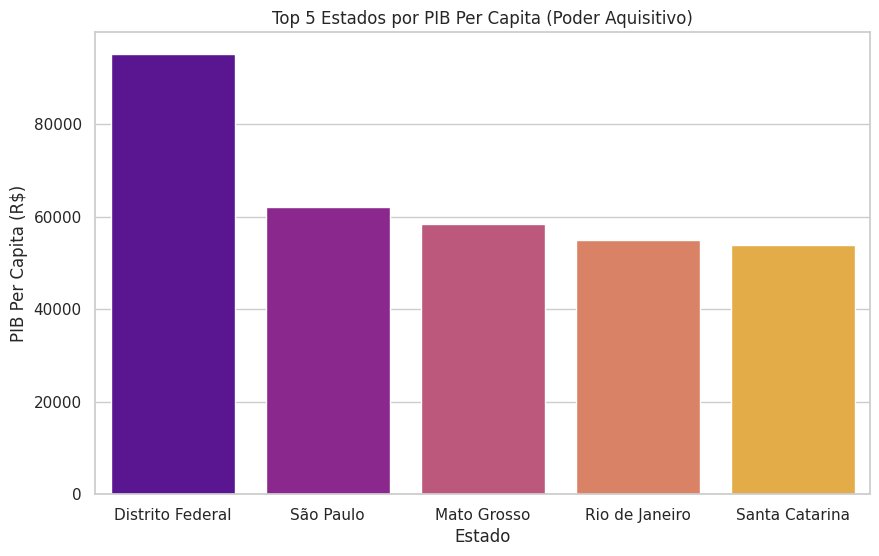

In [11]:
sns.set(style="whitegrid")

# Pergunta 1: Top 5 Estados por População (Mercado Consumidor)
top_5_populacao = df_completo.sort_values(by='Populacao_Total', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_populacao,
    x='Nome_Estado',
    y='Populacao_Total',
    palette='viridis'
)
plt.title('Top 5 Estados por População (Mercado Consumidor)')
plt.ylabel('População (dezenas de milhões)')
plt.xlabel('Estado')
plt.show()

# Pergunta 2: Top 5 Estados por PIB Per Capita (Poder Aquisitivo)
top_5_pib_pc = df_completo.sort_values(by='PIB_Per_Capita', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_pib_pc,
    x='Nome_Estado',
    y='PIB_Per_Capita',
    palette='plasma'
)
plt.title('Top 5 Estados por PIB Per Capita (Poder Aquisitivo)')
plt.ylabel('PIB Per Capita (R$)')
plt.xlabel('Estado')
plt.show()

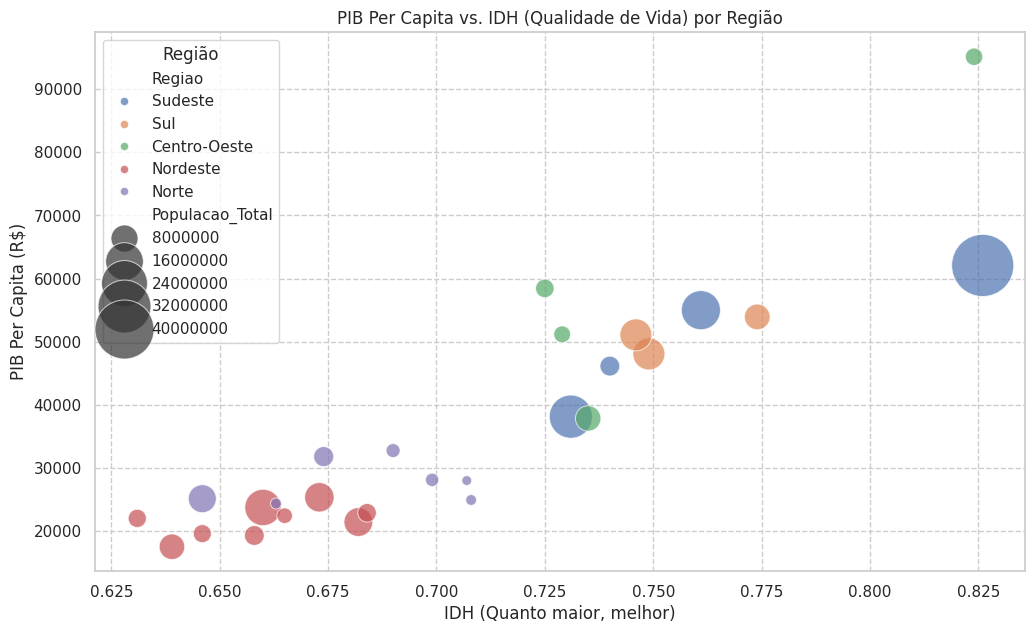

Insight: Há uma correlação positiva clara. Estados com maior PIB per capita (ex: DF, SP) tendem a ter maior IDH. O Nordeste (azul) se agrupa na parte inferior esquerda (menor IDH/PIB per capita), enquanto o Sudeste (laranja) e Sul (verde) se agrupam na parte superior direita.


In [12]:
# Habilidade Nova: Scatterplot (Gráfico de Dispersão)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_completo,
    x='IDH',
    y='PIB_Per_Capita',
    hue='Regiao', # Cor por Região
    size='Populacao_Total', # Tamanho por População
    sizes=(50, 2000),
    alpha=0.7
)

plt.title('PIB Per Capita vs. IDH (Qualidade de Vida) por Região')
plt.xlabel('IDH (Quanto maior, melhor)')
plt.ylabel('PIB Per Capita (R$)')
plt.legend(title='Região')
plt.grid(True, which="both", ls="--")
plt.show()

print("Insight: Há uma correlação positiva clara. Estados com maior PIB per capita (ex: DF, SP) tendem a ter maior IDH. O Nordeste (azul) se agrupa na parte inferior esquerda (menor IDH/PIB per capita), enquanto o Sudeste (laranja) e Sul (verde) se agrupam na parte superior direita.")

/tmp/ipython-input-935898670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


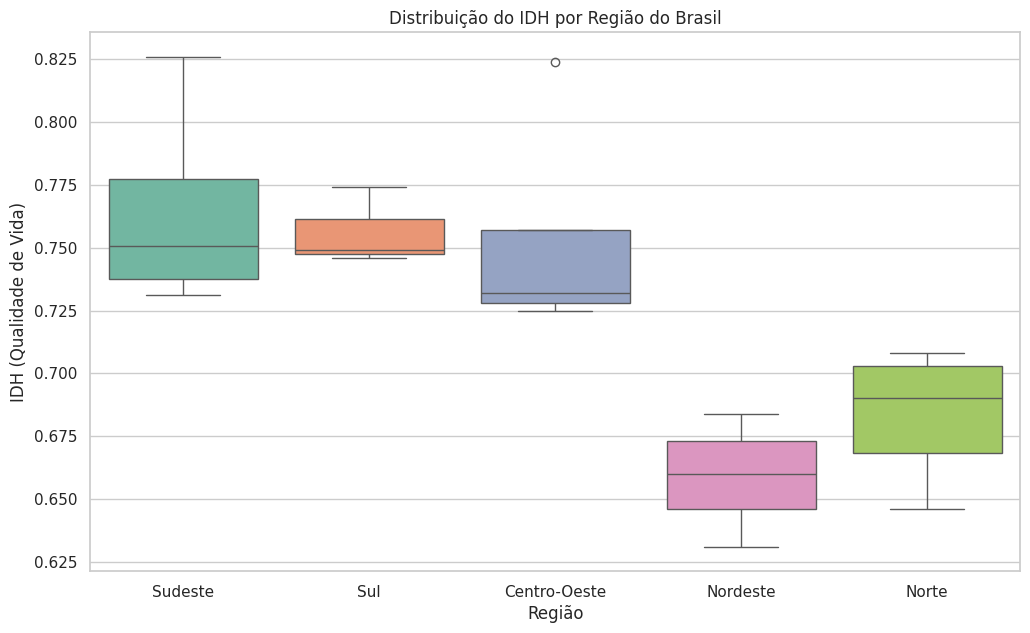

Insight: O Boxplot mostra claramente a desigualdade. O Sudeste, Sul e Centro-Oeste têm medianas de IDH muito mais altas e menos variabilidade ('caixas' menores) do que o Norte e, especialmente, o Nordeste, que tem a maior variação e a menor mediana.


In [13]:
# Habilidade Nova: Boxplot (Diagrama de Caixa)

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_completo,
    x='Regiao',
    y='IDH',
    palette='Set2'
)
plt.title('Distribuição do IDH por Região do Brasil')
plt.ylabel('IDH (Qualidade de Vida)')
plt.xlabel('Região')
plt.show()

print("Insight: O Boxplot mostra claramente a desigualdade. O Sudeste, Sul e Centro-Oeste têm medianas de IDH muito mais altas e menos variabilidade ('caixas' menores) do que o Norte e, especialmente, o Nordeste, que tem a maior variação e a menor mediana.")

Conclusões Finais (Recomendações para o Cliente):

Limpeza de Dados é Essencial: O dado de PIB veio como texto "sujo" (ex: "R$ 1.000.000,00"). A limpeza com Regex (.replace()) foi o primeiro passo obrigatório para qualquer análise numérica.

Mercado de Massa (Volume): Se o cliente quer lançar um produto de baixo custo e alto volume, o foco deve ser o estado de São Paulo, que tem mais de 44 milhões de pessoas (quase o dobro do segundo lugar, Minas Gerais).

Mercado de Luxo (Poder Aquisitivo): Se o cliente quer lançar um produto de alto valor (ex: eletrônicos de luxo), o foco deve ser o Distrito Federal (DF), que tem o maior PIB per capita do país, seguido por São Paulo e Rio de Janeiro.

Desigualdade Regional: A análise (Scatterplot e Boxplot) prova que o Brasil não é um mercado único. A estratégia de marketing para o Sudeste/Sul (alto IDH, alto PIB p.c.) deve ser completamente diferente da estratégia para o Nordeste (IDH e PIB p.c. mais baixos, mas com grande população e potencial de crescimento).